In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
from copy import deepcopy
from scipy import stats
from sklearn.metrics import f1_score 
 
data = loadmat('ex8data1.mat')  
X = data['X']   

print(X.shape)

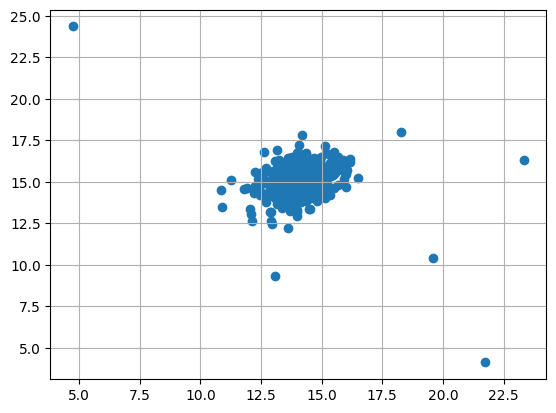

In [3]:
throughtPut = X[:,0]
latency = X[:,1]

plt.figure(0)
plt.scatter(throughtPut, latency)
plt.grid()

(array([  1.,   0.,   1.,   2.,  53., 219.,  30.,   0.,   0.,   1.]),
 array([ 4.12623222,  6.14864973,  8.17106723, 10.19348473, 12.21590223,
        14.23831974, 16.26073724, 18.28315474, 20.30557224, 22.32798975,
        24.35040725]),
 <BarContainer object of 10 artists>)

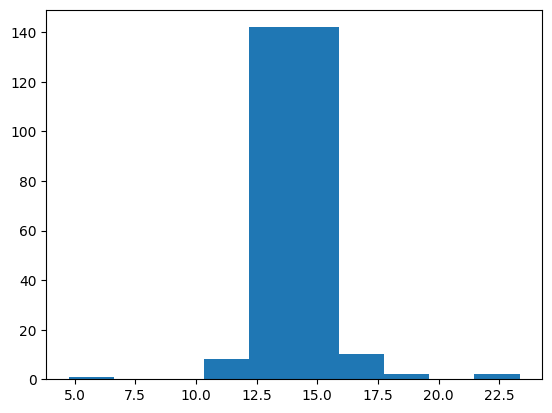

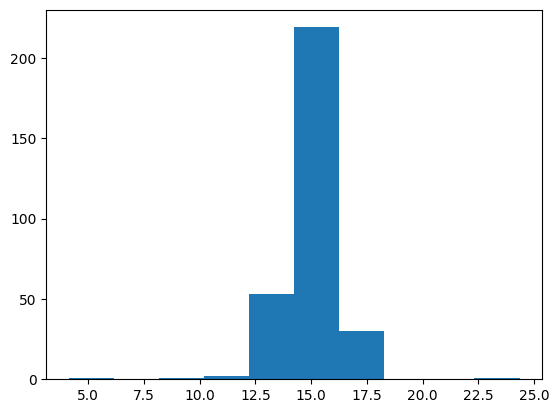

In [4]:
plt.figure(1)
plt.hist(throughtPut, bins=10)

plt.figure(2)
plt.hist(latency, bins=10)

In [5]:
def estimate_gaussian(X):  
    
    mu = []
    sigma = []
    copyX = deepcopy(X)
    for feature in range(X.shape[1]):
        actualFeature = copyX[:,feature]
        lenActualFeature = len(actualFeature)
        actualMu = np.sum(actualFeature)/lenActualFeature
        mu.append(actualMu)
        
        standardDeviationActualFeature = np.sqrt(np.sum(np.square(actualFeature - actualMu))/lenActualFeature)
        sigma.append(standardDeviationActualFeature)
        
    return np.array(mu), np.array(sigma)
 
# TODO: run the function for your dataset

mu, sigma = estimate_gaussian(X)
print(mu, sigma)

[14.11222578 14.99771051] [1.35374717 1.3075723 ]


In [6]:
Xval = data['Xval']  
yval = data['yval']
 
# TODO: check the number of data (Xval.shape) and yval==1.0

print(Xval.shape)
print(len([x for x in yval if x ==1]))

(307, 2)
9


a


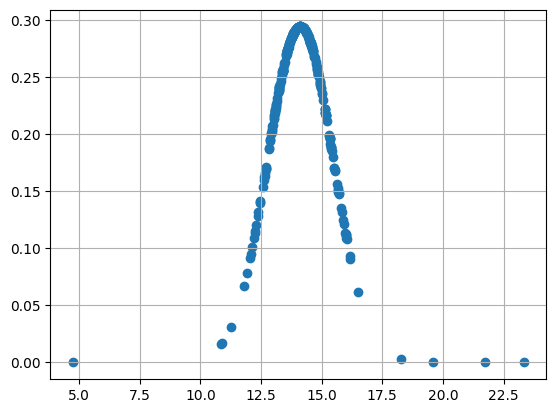

In [7]:
gau = stats.norm.pdf(X[:,0], mu[0], sigma[0])
print('a')

plt.figure(4)
plt.scatter(X[:,0], gau)
plt.grid()


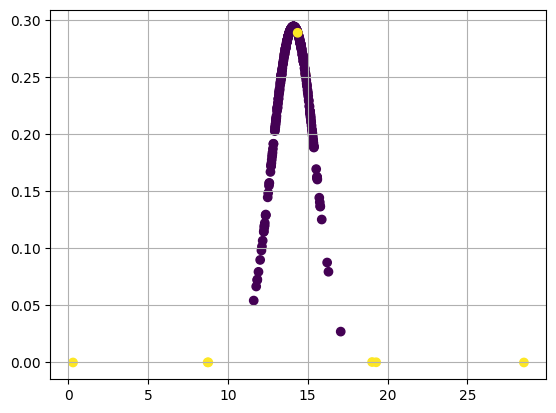

In [8]:
pval = stats.norm.pdf(Xval[:,0], mu[0], sigma[0])

plt.figure(6)
plt.scatter(Xval[:,0], pval, c=yval)
plt.grid()

# def OwnSelect_threshold(pval, yval): 
#     # TODO: select the best epsilon based on the F1 score
#     candidate = np.linspace(0,1, 1000)
#     setEpsilon = np.zeros_like(candidate)
#     for elem, idx in enumerate(candidate):
#         predYval = [1 for x in pval if x<elem]
#         differential = np.sum(np.abs(predYval - yval))
#         setEpsilon[idx] = differential   
# return best_epsilon, best_f1


In [30]:
def select_threshold(pval, yval): 
    # TODO: select the best epsilon based on the F1 score
    candidate = np.linspace(0,1, 1000)
    setEpsilon = []
    best_epsilon = 100
    best_f1 = 100
    for idx, elem in enumerate(candidate):
        predYval = [1 if x<elem else 0 for x in pval]
        sumpredYval = sum(predYval)
        sumYval = sum(yval)
        setEpsilon.append(f1_score(yval, predYval))
    
    best_f1 = max(setEpsilon)
    idx = setEpsilon.index(best_f1)
    best_epsilon = candidate[idx]
            
    return best_epsilon, best_f1

In [31]:
result = select_threshold(pval, yval)


In [32]:
print(result)

(0.001001001001001001, 0.8)


6


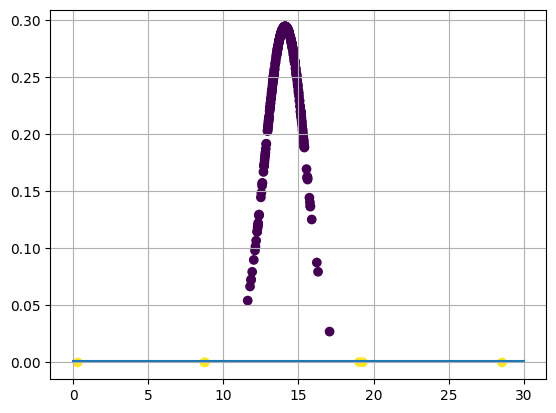

In [41]:
setAnomalies = [1 if x < result[0] else 0 for x in pval]
print(sum(setAnomalies))

plt.figure(7)
plt.scatter(Xval[:,0], pval, c=setAnomalies)
plt.plot([0,30], [result[0], result[0]])
plt.grid()

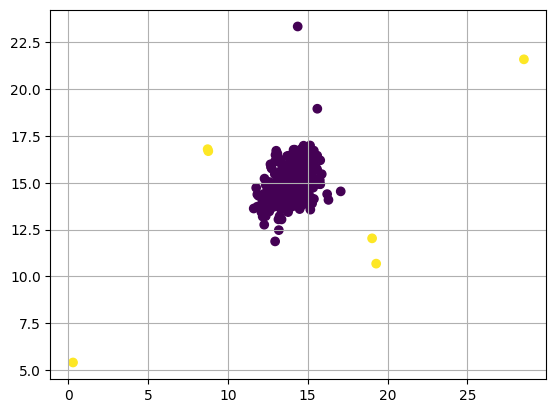

In [42]:
plt.figure(9)
plt.scatter(Xval[:,0], Xval[:,1], c=setAnomalies)
plt.grid()

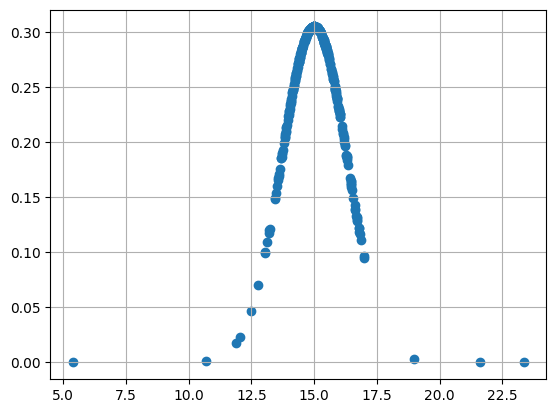

In [46]:
pval2 = stats.norm.pdf(Xval[:,1], mu[1], sigma[1])

plt.figure(10)
plt.scatter(Xval[:,1], pval2)
plt.grid()

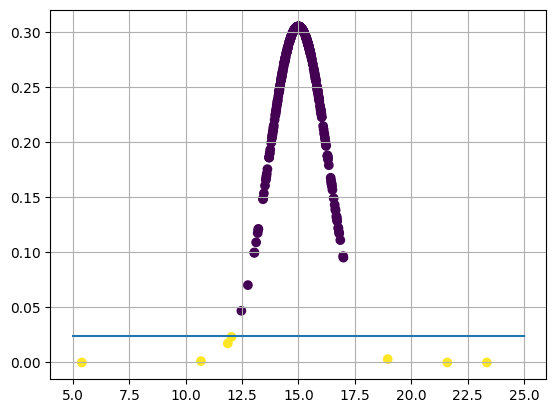

In [52]:
epsilon, f1 = select_threshold(pval2, yval)
setAnomalies2 = [1 if x<epsilon else 0 for x in pval2]

plt.figure(11)
plt.scatter(Xval[:,1], pval2, c=setAnomalies2)
plt.plot([5,25], [epsilon, epsilon])
plt.grid()

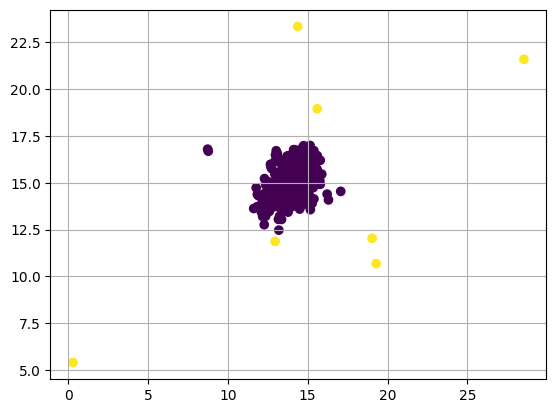

In [49]:
plt.figure(12)
plt.scatter(Xval[:,0], Xval[:,1], c=setAnomalies2)
plt.grid()

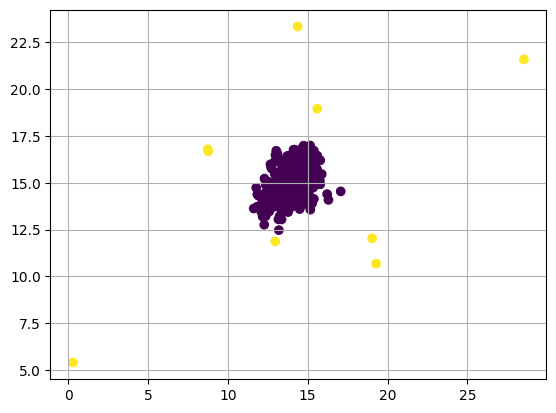

In [51]:
allSetAnomalies = []
for i in range(len(setAnomalies)):
    if setAnomalies[i]==1 or setAnomalies2[i]==1:
        allSetAnomalies.append(1)
    else:
        allSetAnomalies.append(0)

plt.figure(14)
plt.scatter(Xval[:,0], Xval[:,1],c=allSetAnomalies)
plt.grid()